In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import VotingClassifier

In [3]:
cardio = pd.read_csv('cardio_train.csv',delimiter=';')
cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [40]:
cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


## Things to note about Dataset

age - Age of patient in years

gender-Gender of the person sex—(1=male; 0=female).

height-Height of the person in cm

weight- Weight of the person in kgs

ap high-Systolic blood pressure, the top number, measures the force your heart exerts on the walls of your arteries each time it beats

ap lo-Diastolic blood pressure ,the bottom number measures the pressure on the walls of your arteries between heartbeats.

cholesterol-Cholesterol is a wax like substance present in our blood.

gluc -Blood carries glucose to all of our body’s cells to use for energy. (gluc-1: normal,2: prediabetic,3:diabetic)

smoke - Do they smoke or not?Values are in binary

alco -Consumption of alcohol.

active-Physical activity of a person.

cardio-The target variable which defines the presence or absence of cardiovascular disease.

In [5]:
cardio.shape

(70000, 13)

In [6]:
cardio['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

## Null Values checking

In [8]:
cardio.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Check for duplicate values

In [9]:
cardio[cardio.duplicated()]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio


In [11]:
cardio.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#plotting the correlation matrix
cardio.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486


# Cross tabulate all variables everything against cardio

In [14]:
pd.crosstab(cardio.age,cardio.cardio)

cardio,0,1
age,,
10798,1,0
10859,1,0
10878,1,0
10964,1,0
14275,0,1
...,...,...
23687,0,1
23690,0,1
23692,0,1


In [15]:
pd.crosstab(cardio.gender,cardio.cardio)

cardio,0,1
gender,,
1,22914,22616
2,12107,12363


<AxesSubplot:xlabel='gender'>

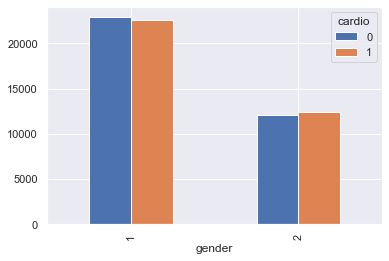

In [16]:
pd.crosstab(cardio.gender,cardio.cardio).plot(kind='bar')

In [17]:
pd.crosstab(cardio.height,cardio.cardio)

cardio,0,1
height,,
55,0,1
57,0,1
59,1,0
60,1,0
64,1,0
...,...,...
197,1,3
198,5,9
200,0,1


In [18]:
pd.crosstab(cardio.weight,cardio.cardio)

cardio,0,1
weight,,
10.0,0,1
11.0,0,1
21.0,0,1
22.0,1,0
23.0,1,0
...,...,...
178.0,2,1
180.0,0,4
181.0,0,1


In [19]:
pd.crosstab(cardio.ap_hi,cardio.cardio)

cardio,0,1
ap_hi,,
-150,0,1
-140,0,1
-120,1,1
-115,1,0
-100,2,0
...,...,...
11020,0,1
11500,0,1
13010,1,1


In [20]:
pd.crosstab(cardio.ap_lo,cardio.cardio)

cardio,0,1
ap_lo,,
-70,0,1
0,15,6
1,1,0
6,2,0
7,2,0
...,...,...
9011,0,2
9100,0,1
9800,1,0


In [21]:
pd.crosstab(cardio.cholesterol,cardio.cardio)

cardio,0,1
cholesterol,,
1,29330,23055
2,3799,5750
3,1892,6174


<AxesSubplot:xlabel='cholesterol'>

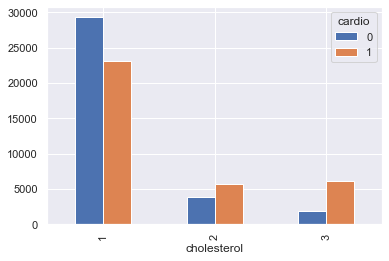

In [22]:
pd.crosstab(cardio.cholesterol,cardio.cardio).plot(kind='bar')

In [27]:
pd.crosstab(cardio.gluc,cardio.cardio)

cardio,0,1
gluc,,
1,30894,28585
2,2112,3078
3,2015,3316


<AxesSubplot:xlabel='gluc'>

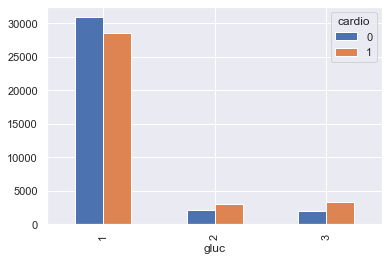

In [28]:
pd.crosstab(cardio.gluc,cardio.cardio).plot(kind='bar')

In [29]:
pd.crosstab(cardio.smoke,cardio.cardio)

cardio,0,1
smoke,,
0,31781,32050
1,3240,2929


<AxesSubplot:xlabel='smoke'>

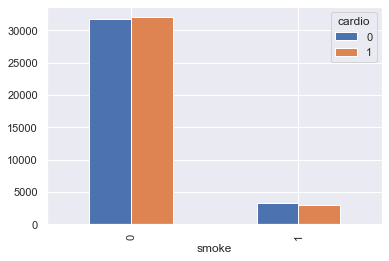

In [30]:
pd.crosstab(cardio.smoke,cardio.cardio).plot(kind='bar')

In [31]:
pd.crosstab(cardio.alco,cardio.cardio)

cardio,0,1
alco,,
0,33080,33156
1,1941,1823


<AxesSubplot:xlabel='alco'>

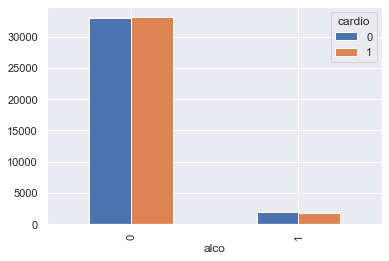

In [32]:
pd.crosstab(cardio.alco,cardio.cardio).plot(kind='bar')

In [34]:
pd.crosstab(cardio.active,cardio.cardio)

cardio,0,1
active,,
0,6378,7361
1,28643,27618


<AxesSubplot:xlabel='active'>

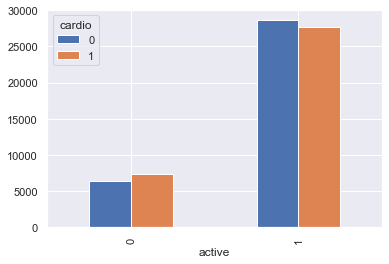

In [35]:
pd.crosstab(cardio.active,cardio.cardio).plot(kind='bar')

### Data Visualization

0 - noncardio, 1 - cardio
0    35021
1    34979
Name: cardio, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

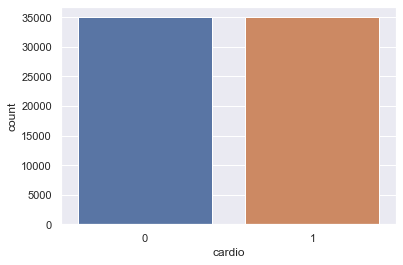

In [37]:
#for cardio
print("0 - noncardio, 1 - cardio")
x=(cardio.cardio.value_counts())
print(x)
sb.countplot(cardio["cardio"])

1: normal, 2: above normal, 3: well above normal
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64


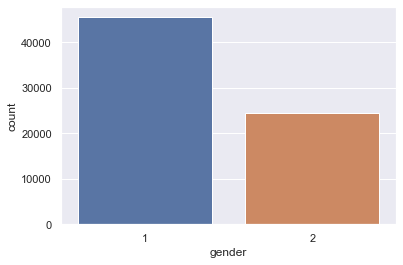

In [38]:
#For gender
print("1: normal, 2: above normal, 3: well above normal")
x=(cardio.cholesterol.value_counts())
print(x)
p = sb.countplot(data=cardio, x="gender")
plt.show()

1: normal, 2: above normal, 3: well above normal
1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64


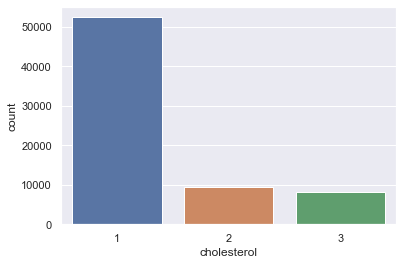

In [39]:
#for Cholesterol 
print("1: normal, 2: above normal, 3: well above normal")
x=(cardio.cholesterol.value_counts())
print(x)
p = sb.countplot(data=cardio, x="cholesterol")
plt.show()

0 - Non Smoker , 1 - Smoker
0    63831
1     6169
Name: smoke, dtype: int64


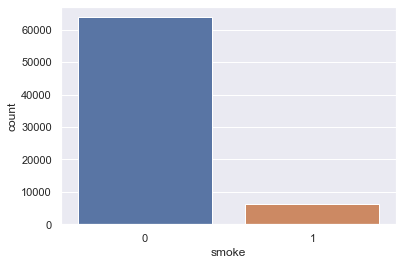

In [41]:
#for smoke
print("0 - Non Smoker , 1 - Smoker")
x=(cardio.smoke.value_counts())
print(x)
p = sb.countplot(data=cardio, x="smoke")
plt.show()

0 - Non alco , 1 - alco
0    66236
1     3764
Name: alco, dtype: int64


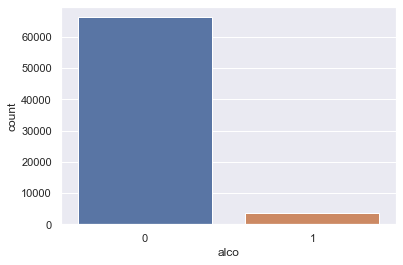

In [42]:
#for alcohol
print("0 - Non alco , 1 - alco")
x=(cardio.alco.value_counts())
print(x)
p = sb.countplot(data=cardio, x="alco")
plt.show()

<Figure size 3600x2880 with 0 Axes>

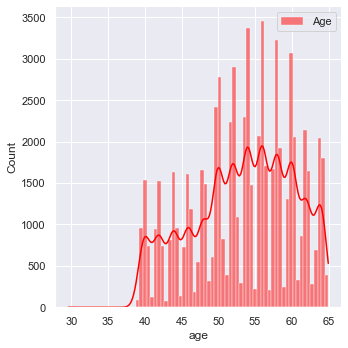

In [46]:
#Density Distribution for age
plt.figure(figsize=(50,40))
sb.displot(cardio.age/365, color="red", kde= True,label="Age")
plt.legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


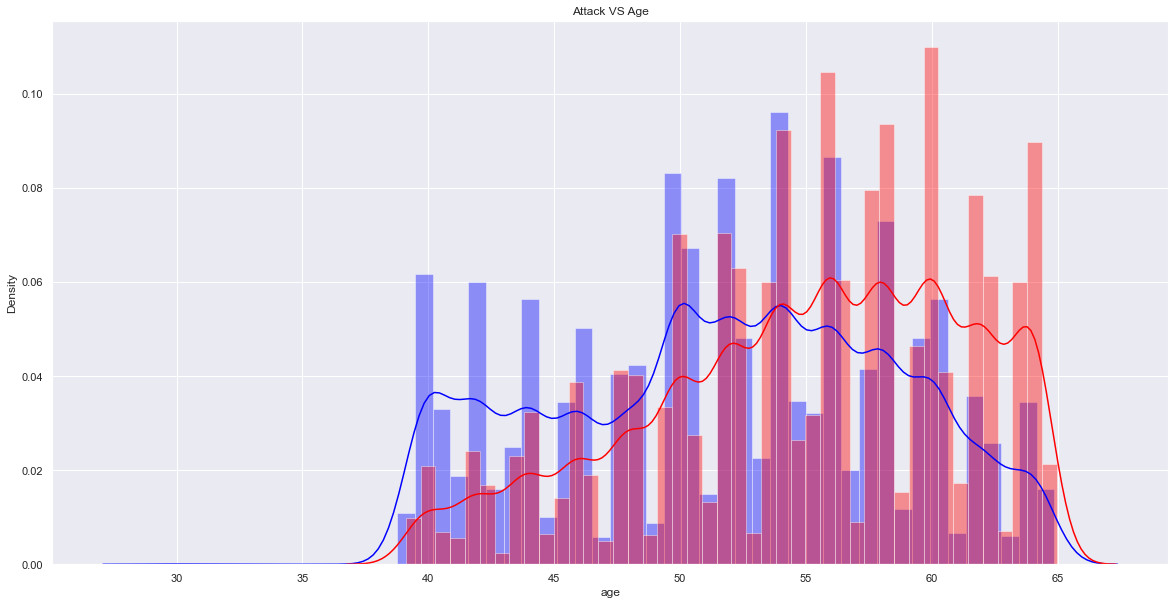

In [47]:
#Heart attack v/s age 
plt.figure(figsize=(20,10))
sb.distplot(cardio[cardio['cardio'] == 0]["age"]/365, color='blue',kde=True) 
sb.distplot(cardio[cardio['cardio'] == 1]["age"]/365, color='red',kde=True)
plt.title('Attack VS Age')
plt.show()

Text(0.5, 0.98, 'Features kde-plot')

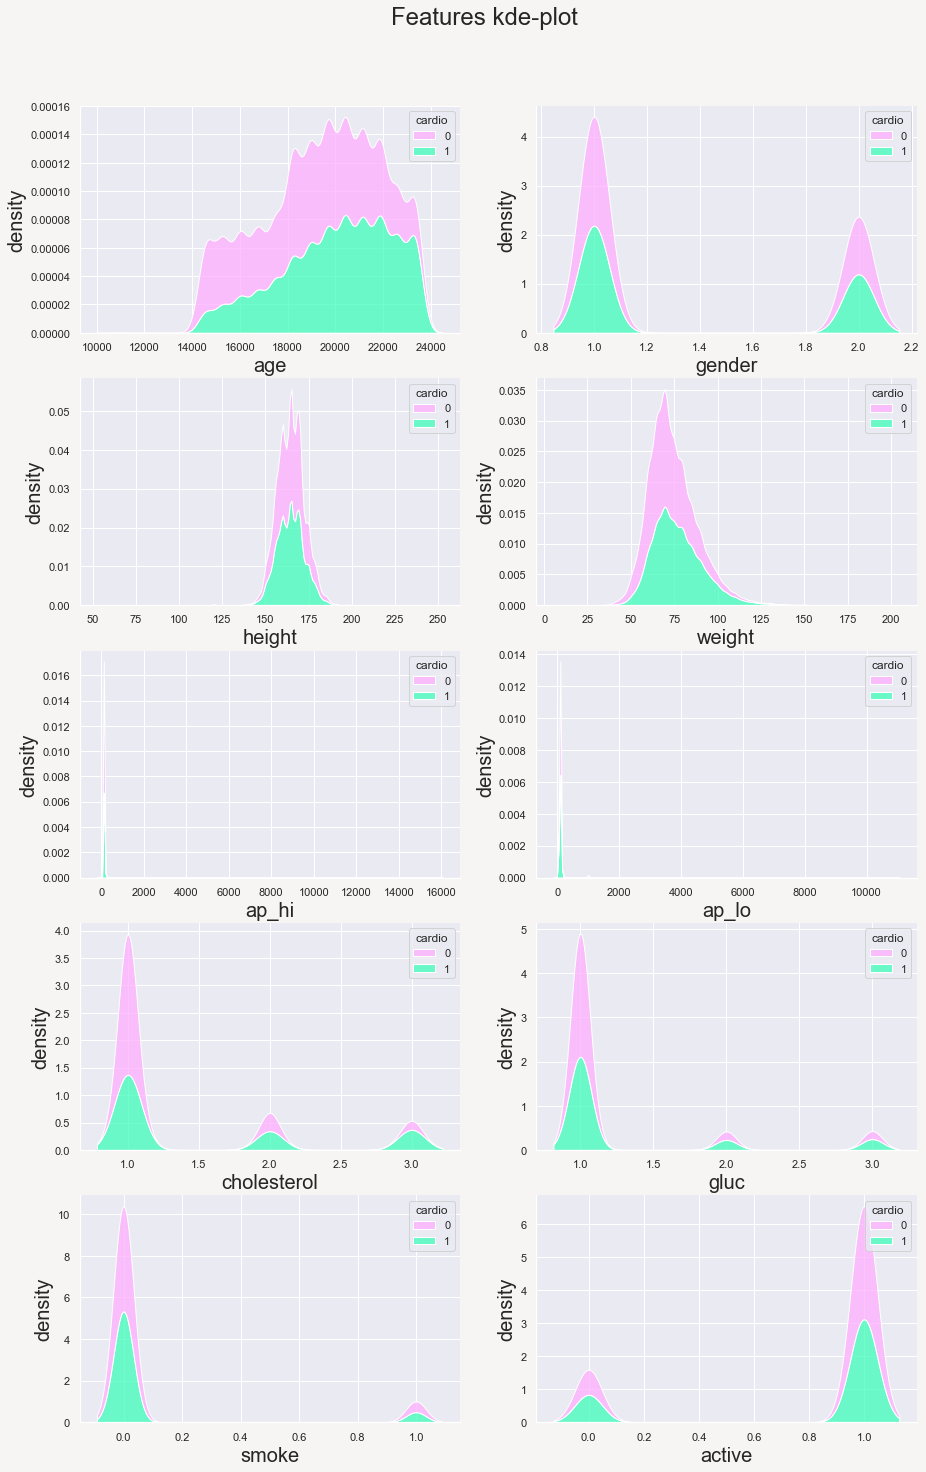

In [50]:
#Kernal density estimate plot of all features in the dataset
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','active']
mypal= ['#FC05FB', '#FEAEFE', '#FCD2FC','#F3FEFA', '#B4FFE4','#3FFEBA']
L = len(num_feats)
ncol= 2
nrow= int(np.ceil(L/ncol))

fig, ax = plt.subplots(nrow, ncol, figsize=(15, 23),facecolor='#F6F5F4')   
fig.subplots_adjust(top=0.92)

i = 1
for col in num_feats:
    plt.subplot(nrow, ncol, i)
    
    ax = sb.kdeplot(data=cardio, x=col, hue="cardio", multiple="stack", palette=mypal[1::4]) 
    ax.set_xlabel(col, fontsize=20)
    ax.set_ylabel("density", fontsize=20)
    sb.despine(right=True)
    sb.despine(offset=0, trim=False)
    
    i = i +1
plt.suptitle('Features kde-plot' ,fontsize = 24)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


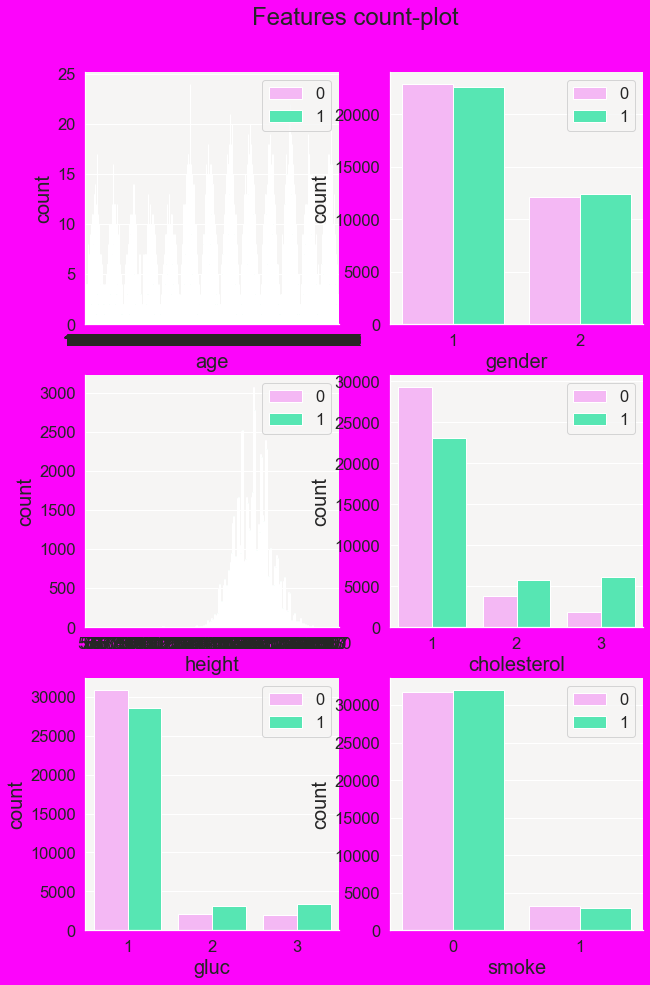

In [150]:
#features count plot-fix the color
num = ['age', 'gender', 'height','cholesterol','gluc','smoke','active']
def hist_plot(df, num):    
    L = len(num)
    ncol= 2
    nrow= int(np.ceil(L/ncol))
    remove_last= (nrow * ncol) - L

    fig, ax = plt.subplots(nrow, ncol,figsize=(10, 15), facecolor='#FC05FB')    
    fig.subplots_adjust(top=0.92)
    ax.flat[-remove_last].set_visible(False)

    i = 1
    for col in num:
        plt.subplot(nrow, ncol, i, facecolor='#F6F5F4')
        g = sb.countplot(data=cardio, x=col, hue="cardio", palette=mypal[1::4])
        g.set_xlabel(col, fontsize=20)
        g.set_ylabel("count", fontsize=20)
        sb.despine(right=True)
        sb.despine(offset=0, trim=False) 
        plt.legend(facecolor='#F6F5F5')
        i = i +1

    plt.suptitle('Features count-plot' ,fontsize = 24)
    return 0

hist_plot(cardio, num[0:-1]);

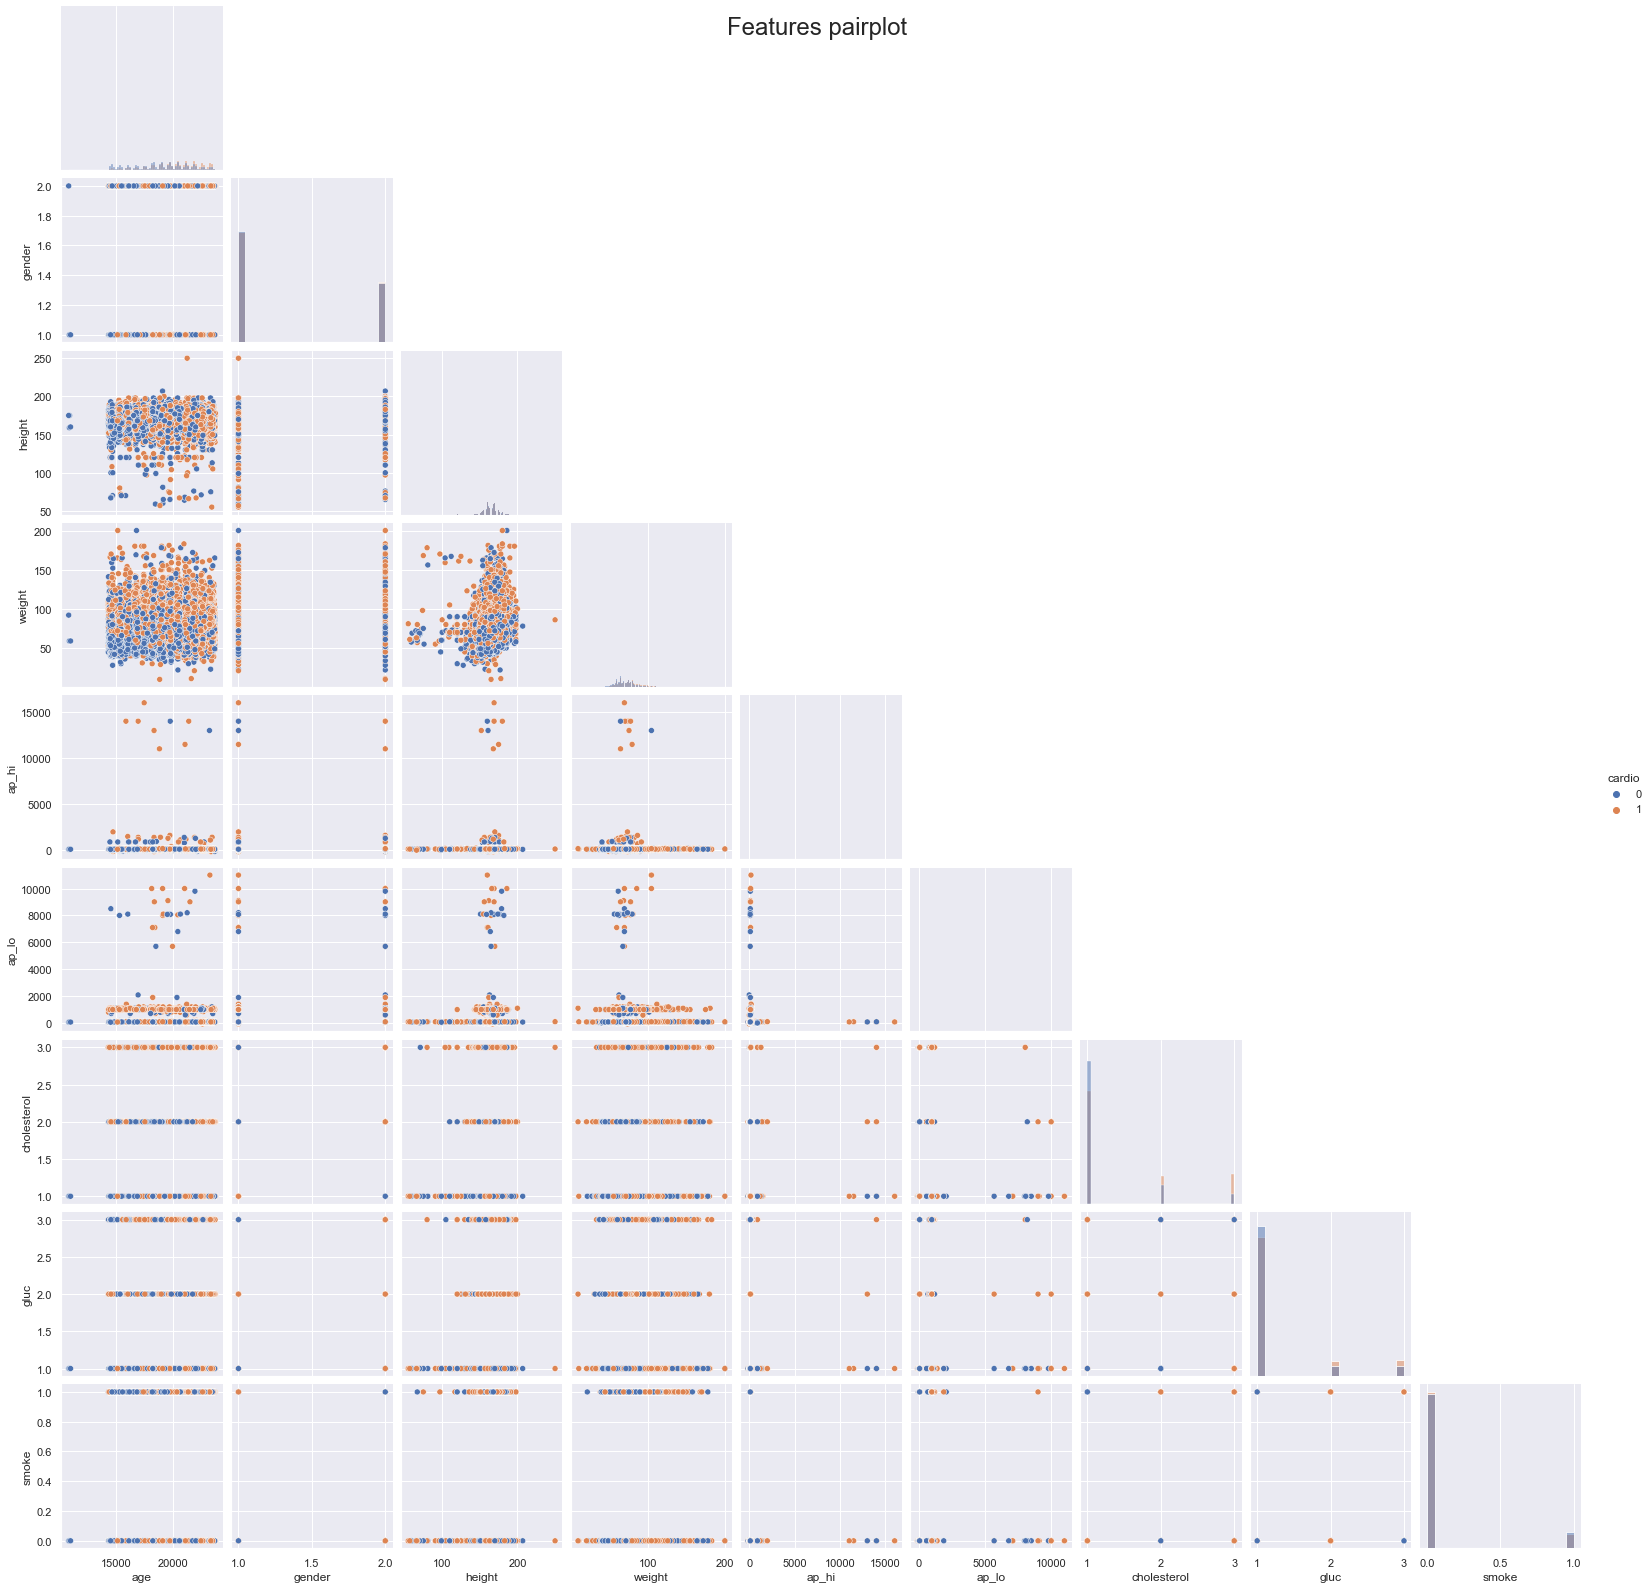

In [55]:
#features pair plots
num_feats = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo','cholesterol','gluc','smoke','cardio']
data = cardio[num_feats]
g = sb.pairplot(data, hue="cardio", corner=True, diag_kind='hist')
plt.suptitle('Features pairplot' ,fontsize = 24);

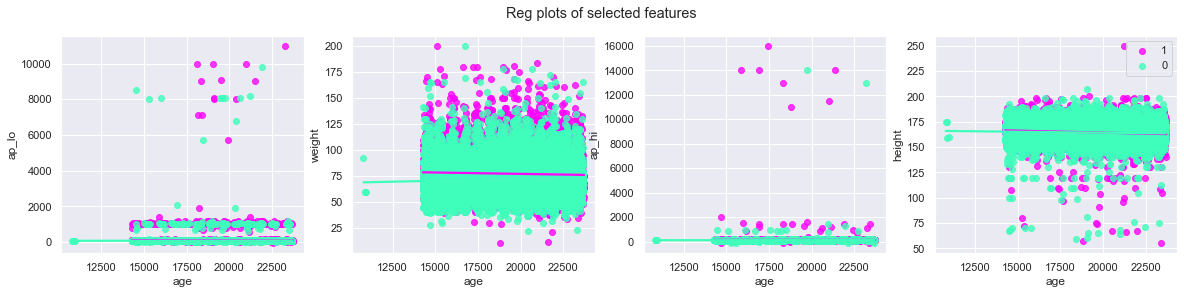

In [56]:
#reg plot of features
fig, ax = plt.subplots(1,4, figsize=(20, 4))
sb.regplot(data=cardio[cardio['cardio'] ==1], x='age', y='ap_lo', ax = ax[0], color=mypal[0], label='1')
sb.regplot(data=cardio[cardio['cardio'] ==0], x='age', y='ap_lo', ax = ax[0], color=mypal[5], label='0')
sb.regplot(data=cardio[cardio['cardio'] ==1], x='age', y='weight', ax = ax[1], color=mypal[0], label='1')
sb.regplot(data=cardio[cardio['cardio'] ==0], x='age', y='weight', ax = ax[1], color=mypal[5], label='0')
sb.regplot(data=cardio[cardio['cardio'] ==1], x='age', y='ap_hi', ax = ax[2], color=mypal[0], label='1')
sb.regplot(data=cardio[cardio['cardio'] ==0], x='age', y='ap_hi', ax = ax[2], color=mypal[5], label='0')
sb.regplot(data=cardio[cardio['cardio'] ==1], x='age', y='height', ax = ax[3], color=mypal[0], label='1')
sb.regplot(data=cardio[cardio['cardio'] ==0], x='age', y='height', ax = ax[3], color=mypal[5], label='0')
plt.suptitle('Reg plots of selected features')
plt.legend();

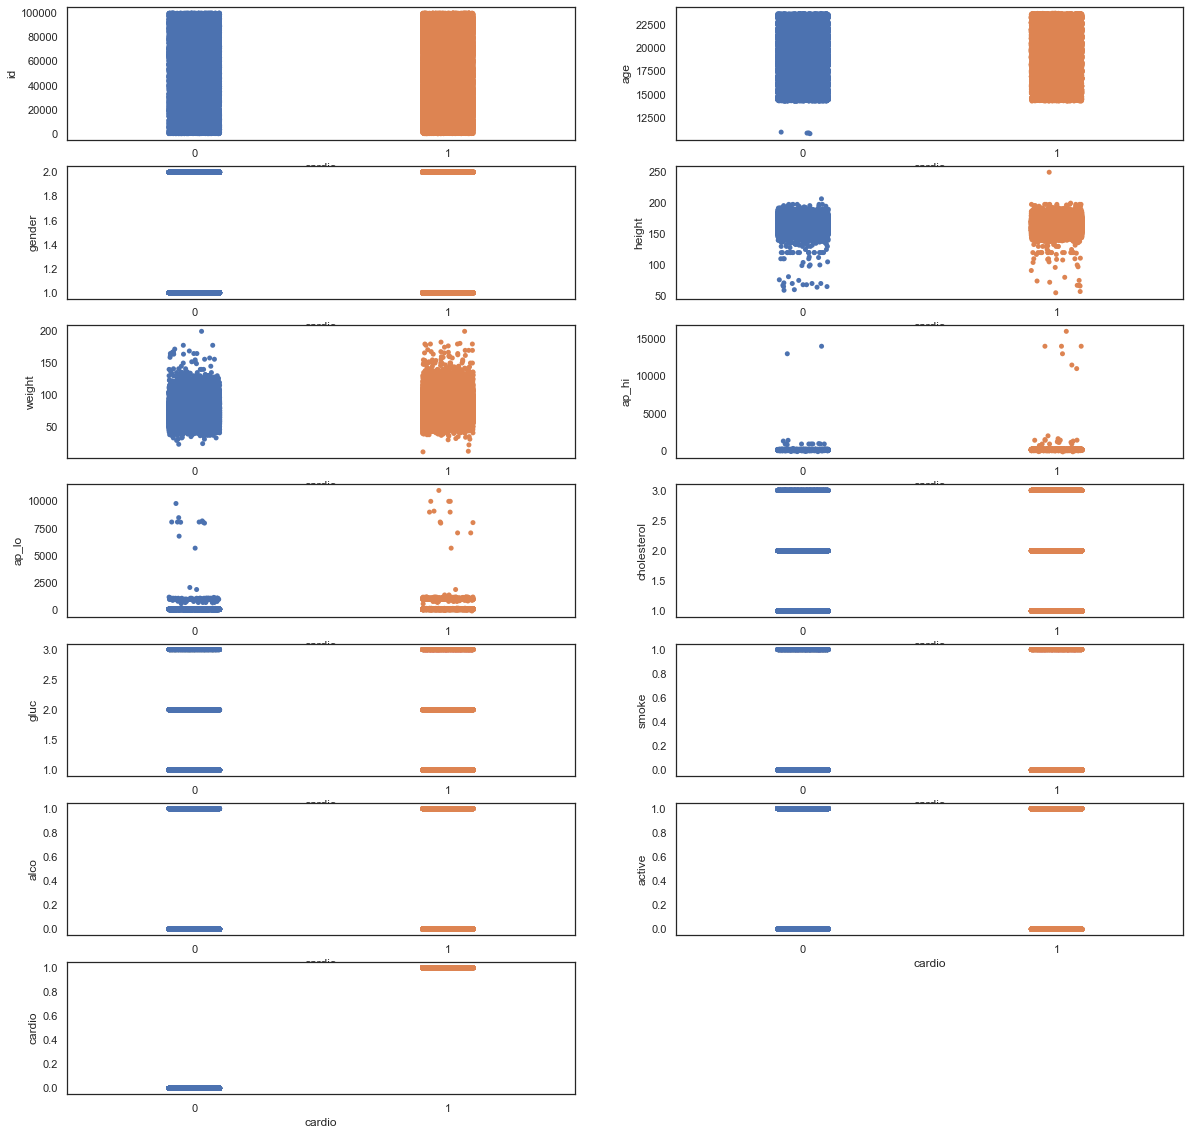

In [58]:
#strip plot of attributes v/s cardio
columns=cardio.columns

sb.set(rc={'figure.figsize':(20,20)})
j=1
sb.set_style(style='white')

for i in range(len(columns)):
    plt.subplot(7,2,j)
    sb.stripplot(x='cardio', y=columns[i] , data=cardio)
    j=j+1

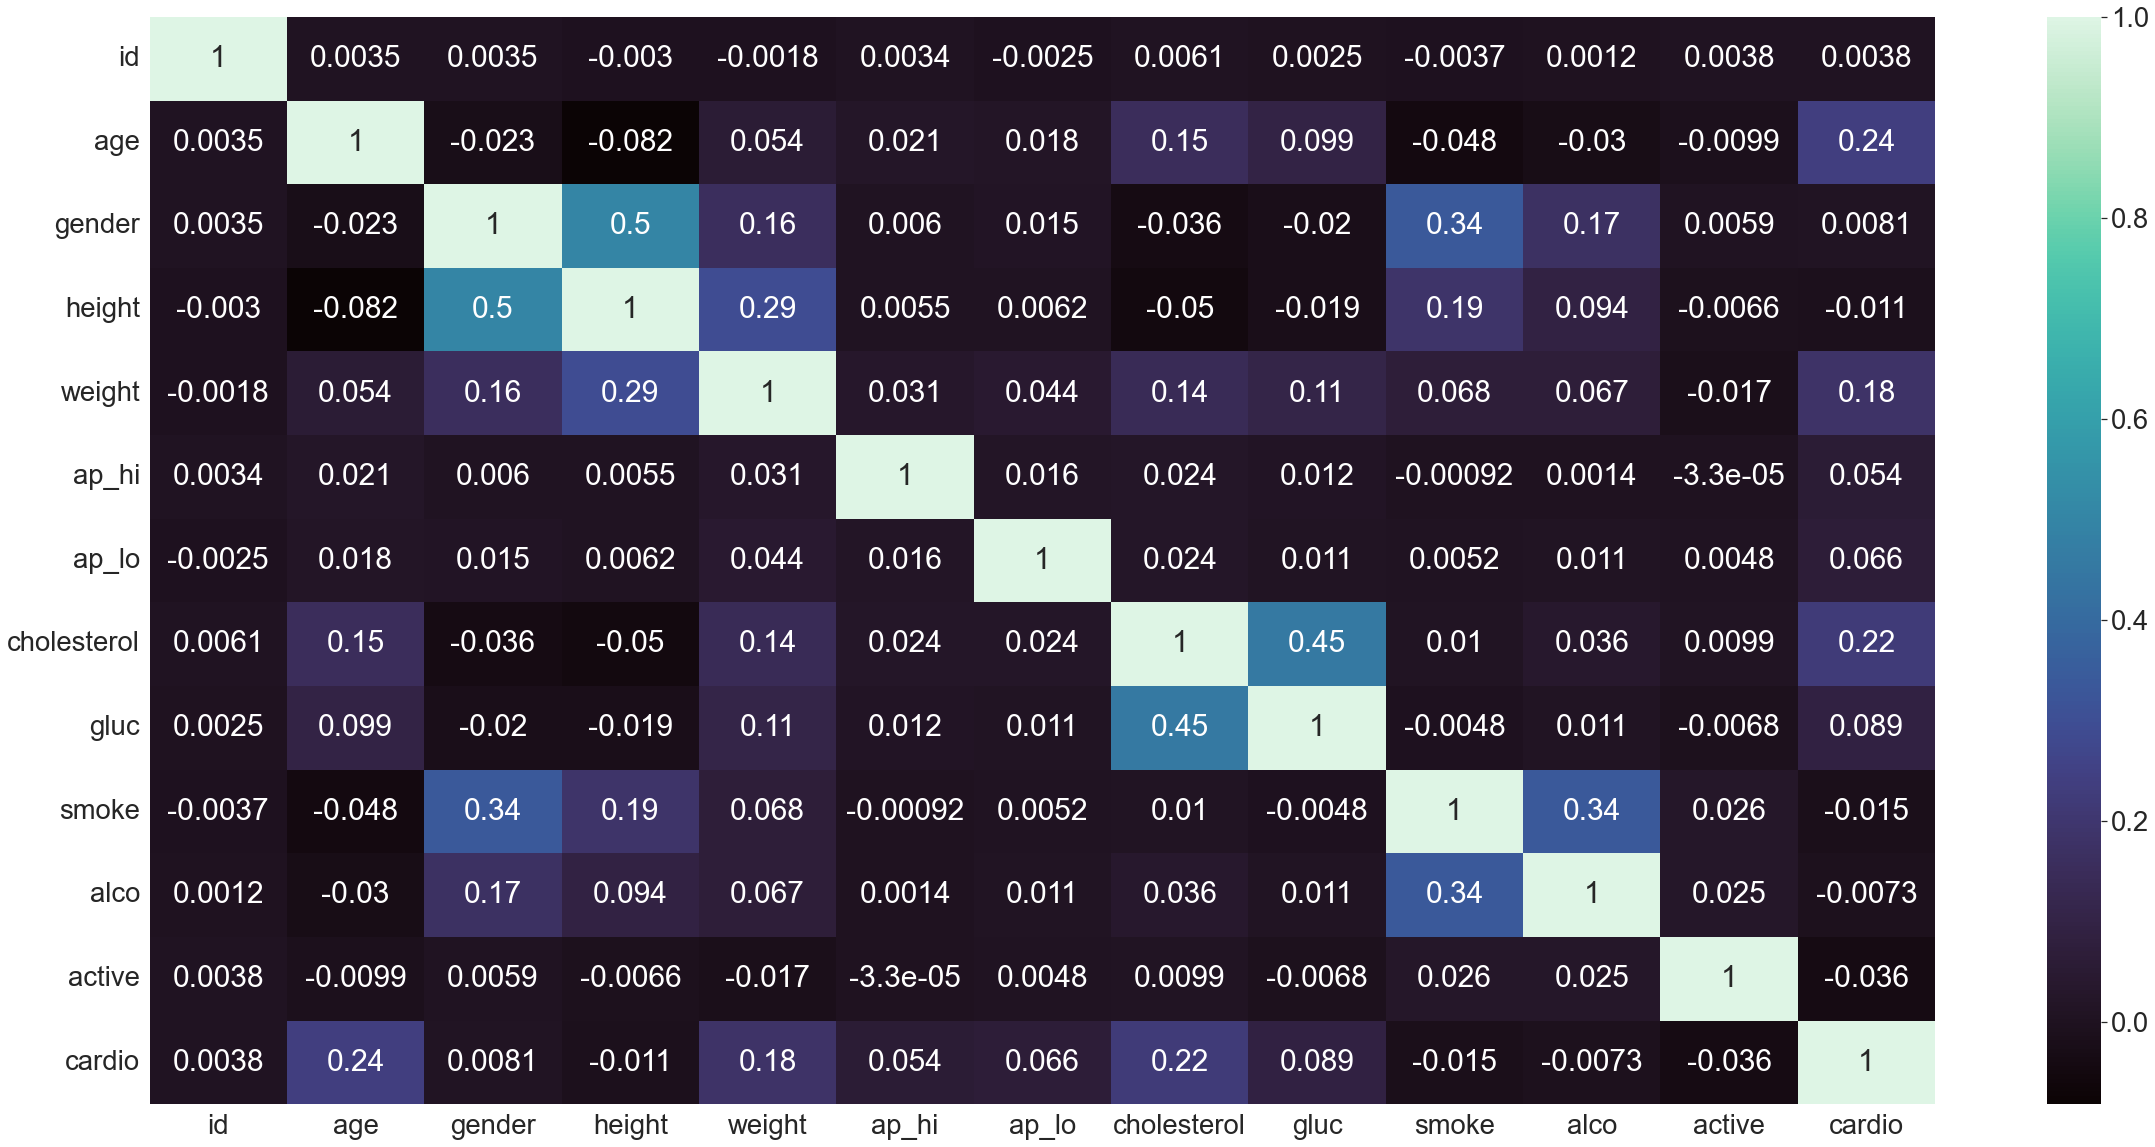

In [72]:
#Correlation of each feature in the dataset
corrmat = cardio.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(40,20))
sb.set(font_scale=2.5)
g=sb.heatmap(cardio[top_corr_features].corr(),annot=True,cmap="mako")

Text(0.5, 1.0, 'Pairwise correlation matrix')

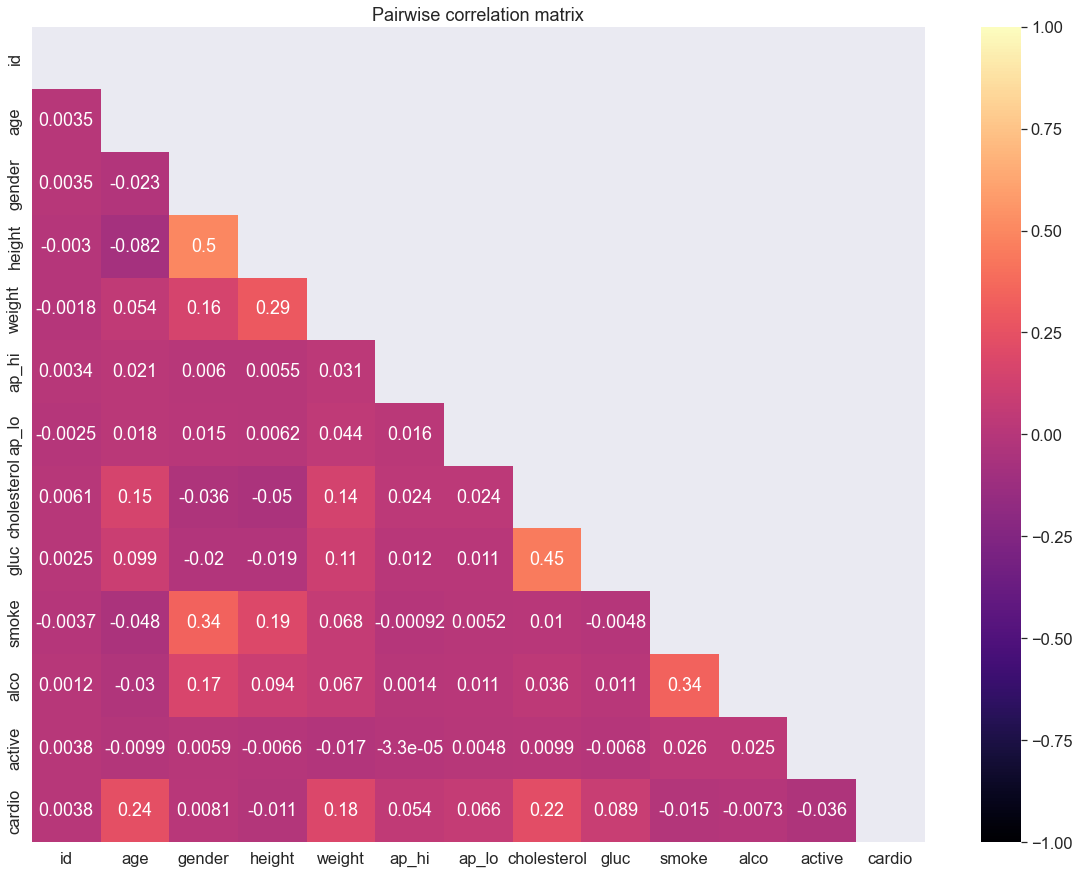

In [76]:
#pair wise correlation matrix
corr_matrix = cardio.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) 
sb.set(font_scale=1.5)
plt.figure(figsize=(20,15))
sb.despine(top=True, right=True, bottom=True)
g1 = sb.heatmap(corr_matrix, mask=mask, vmin=-1, vmax=1,annot=True, cmap="magma")
g1.set_title("Pairwise correlation matrix")

<Figure size 504x504 with 0 Axes>

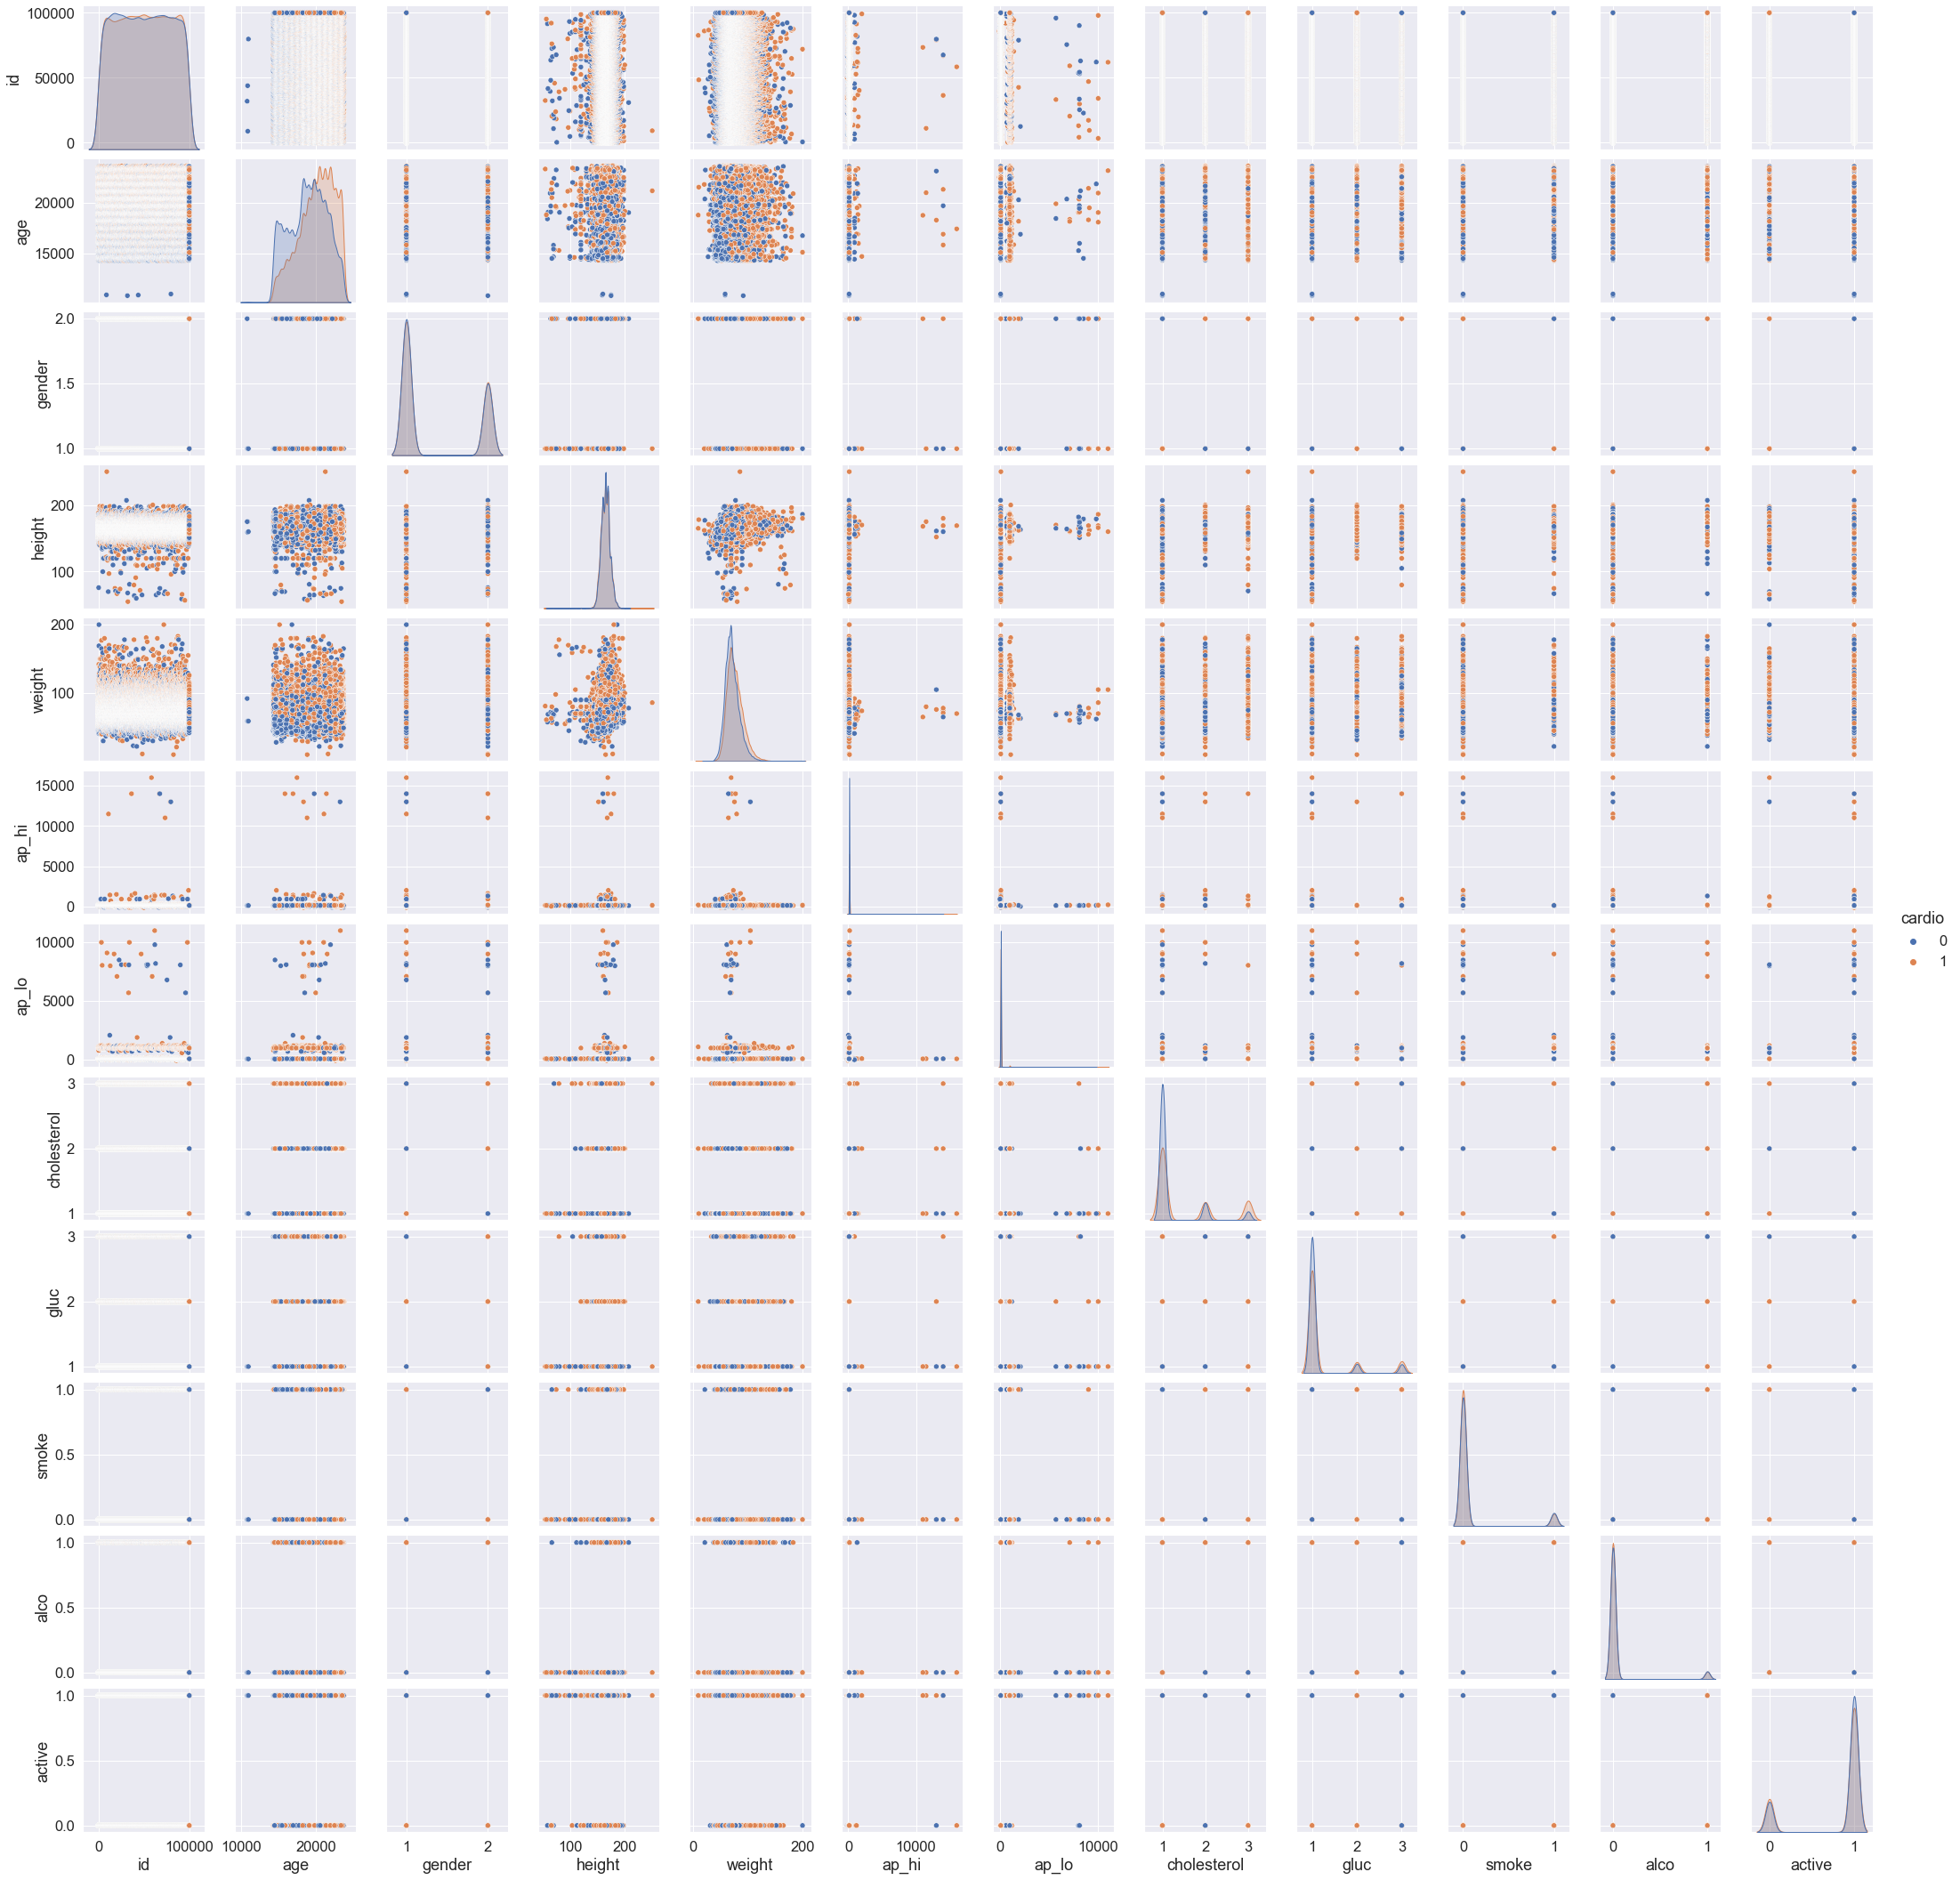

In [77]:
#pair plot
plt.figure(figsize = (7,7))
sb.pairplot(cardio, hue='cardio')
plt.show()

## Data Prepocessing 

In [295]:
#setting up dependent and independent variables 
x = cardio.iloc[:, 0:-1]
y = cardio.iloc[:, -1]
x,y

(          id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
 0          0  18393       2     168    62.0    110     80            1     1   
 1          1  20228       1     156    85.0    140     90            3     1   
 2          2  18857       1     165    64.0    130     70            3     1   
 3          3  17623       2     169    82.0    150    100            1     1   
 4          4  17474       1     156    56.0    100     60            1     1   
 ...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
 69995  99993  19240       2     168    76.0    120     80            1     1   
 69996  99995  22601       1     158   126.0    140     90            2     2   
 69997  99996  19066       2     183   105.0    180     90            3     1   
 69998  99998  22431       1     163    72.0    135     80            1     2   
 69999  99999  20540       1     170    72.0    120     80            2     1   
 
        smoke  alco  activ

#Splitting the dataset into training and testing set
from sklearn.model_selection import train_test_split  
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.15, random_state = 0)

### Noticing the importance of features

In [296]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
ExtraTreesClassifier()
model.feature_importances_

array([0.15934934, 0.20542291, 0.00647621, 0.13565217, 0.14901862,
       0.16921521, 0.104562  , 0.04535565, 0.01139505, 0.00379102,
       0.00447088, 0.00529094])

In [297]:
top = pd.Series(model.feature_importances_,index = x.columns)
top

id             0.159349
age            0.205423
gender         0.006476
height         0.135652
weight         0.149019
ap_hi          0.169215
ap_lo          0.104562
cholesterol    0.045356
gluc           0.011395
smoke          0.003791
alco           0.004471
active         0.005291
dtype: float64

<AxesSubplot:>

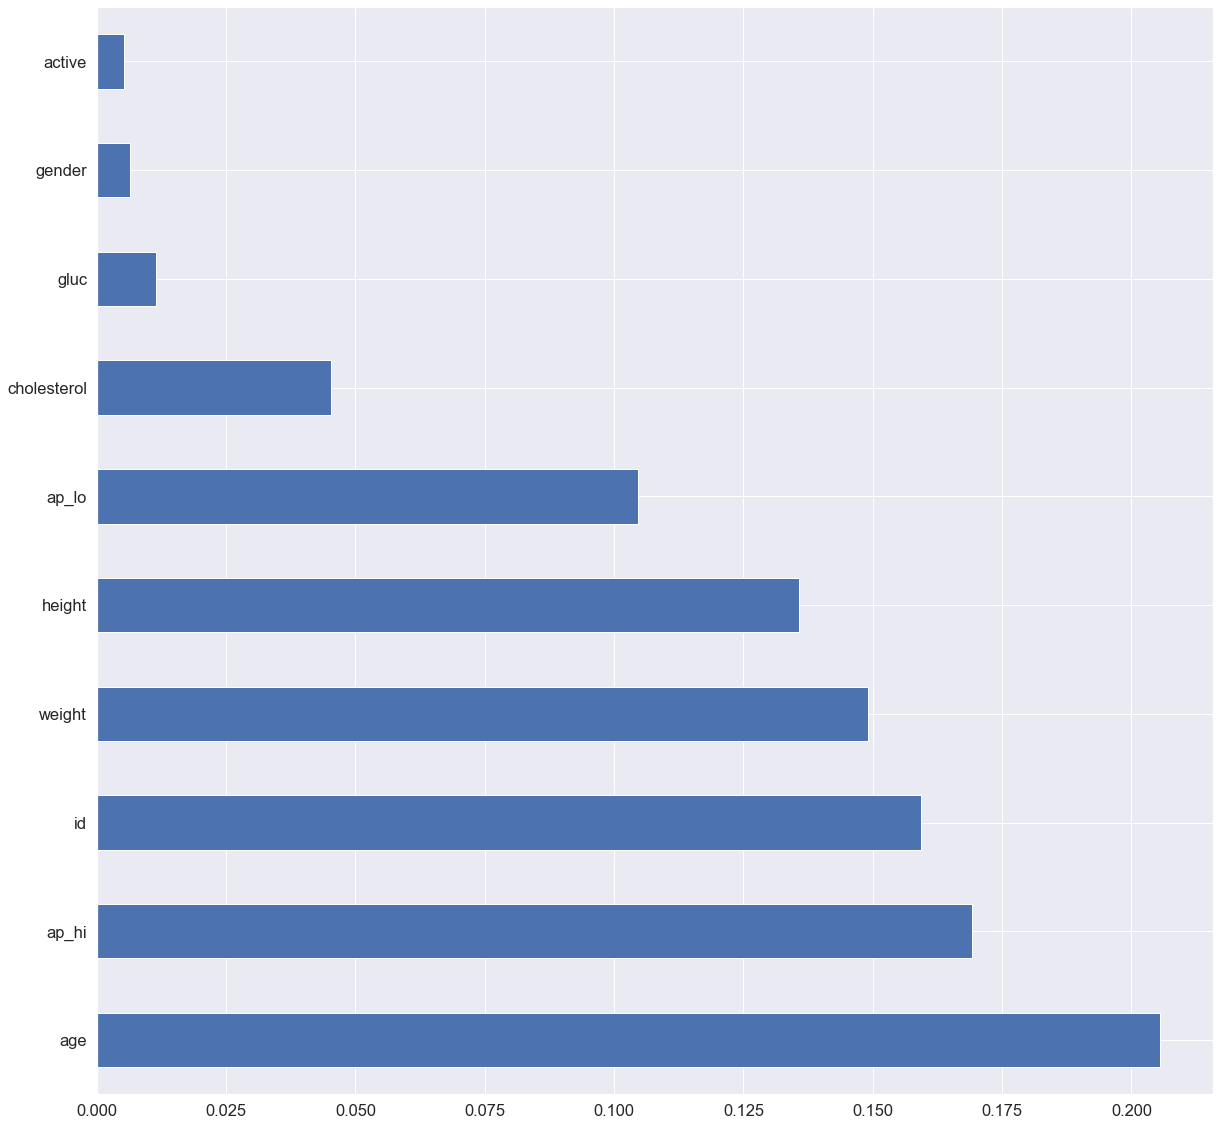

In [298]:
top.nlargest(10).plot(kind = 'barh')

### Based on feature ranking lets select features

In [299]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fit_feature = SelectKBest(score_func=f_classif)

In [300]:
fit_feature.fit(x,y)

SelectKBest()

In [301]:
score_col = pd.DataFrame(fit_feature.scores_,columns =['score value'])
score_col

,score value
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [302]:
name_col = pd.DataFrame(x.columns)

In [303]:
top_feature = pd.concat([name_col,score_col],axis=1)
top_feature

,0,score value
0,id,1.010461
1,age,4209.007957
2,gender,4.603641
3,height,8.197397
4,weight,2388.777887
5,ap_hi,208.339524
6,ap_lo,303.629011
7,cholesterol,3599.361137
8,gluc,562.772977
9,smoke,16.790541


In [304]:
top_feature.nlargest(8,'score value')

,0,score value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541


In [305]:
x = cardio.drop(['smoke','gender'],axis=1)

x = cardio.iloc[:, 0:-1]
y = cardio.iloc[:, -1]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .15,random_state=1)

Feature Scaling

In [306]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)

In [307]:
xtrain,xtest

(array([[-0.8475697 ,  0.74195   , -0.73510089, ..., -0.31102052,
         -0.23903723,  0.49429478],
        [-0.1401636 , -2.00415336,  1.36035749, ..., -0.31102052,
         -0.23903723, -2.02308427],
        [ 1.56858918,  0.73060582,  1.36035749, ..., -0.31102052,
         -0.23903723,  0.49429478],
        ...,
        [ 0.38152283,  1.17829602,  1.36035749, ..., -0.31102052,
         -0.23903723,  0.49429478],
        [ 0.42868093, -0.46823158, -0.73510089, ..., -0.31102052,
         -0.23903723,  0.49429478],
        [ 1.65111585,  0.38379784,  1.36035749, ..., -0.31102052,
         -0.23903723,  0.49429478]]),
 array([[-1.1919625 , -1.7262208 , -0.73510089, ..., -0.31102052,
         -0.23903723,  0.49429478],
        [ 1.05418452,  0.13706179, -0.73510089, ..., -0.31102052,
         -0.23903723,  0.49429478],
        [-0.99365577,  0.44011362, -0.73510089, ..., -0.31102052,
         -0.23903723,  0.49429478],
        ...,
        [-0.89212717, -0.13357809, -0.73510089, ..., -

# Random Forest Classifier

In [308]:
rfc = RandomForestClassifier()
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [309]:
RFC_train = rfc.score(xtrain,ytrain)
RFC_train

1.0

In [310]:
RFC_test = rfc.score(xtest,ytest)
RFC_test

0.7187619047619047

In [311]:
y_pred_rfc = rfc.predict(xtest)
accuracy_score(ytest,y_pred_rfc)

0.7187619047619047

In [312]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
confusion_matrix(ytest,y_pred_rfc)

array([[3979, 1307],
       [1646, 3568]], dtype=int64)

In [313]:
print(classification_report(ytest,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.71      0.75      0.73      5286
           1       0.73      0.68      0.71      5214

    accuracy                           0.72     10500
   macro avg       0.72      0.72      0.72     10500
weighted avg       0.72      0.72      0.72     10500



# Logistic Regression

In [314]:
log =LogisticRegression()

In [315]:
log.fit(xtrain,ytrain)

LogisticRegression()

In [316]:
LOG_train = log.score(xtrain,ytrain)
LOG_train

0.7236806722689075

In [317]:
LOG_test = log.score(xtest,ytest)
LOG_test

0.7189523809523809

In [318]:
y_pred_log = log.predict(xtest)
accuracy_score(ytest,y_pred_log)

0.7189523809523809

In [319]:
confusion_matrix(ytest,y_pred_log)

array([[4074, 1212],
       [1739, 3475]], dtype=int64)

In [320]:
print(classification_report(ytest,y_pred_log))

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      5286
           1       0.74      0.67      0.70      5214

    accuracy                           0.72     10500
   macro avg       0.72      0.72      0.72     10500
weighted avg       0.72      0.72      0.72     10500



# Naives bernoulli

In [321]:
bnb = BernoulliNB()
bnb.fit(xtest,ytest)

BernoulliNB()

In [322]:
BNB_train = bnb.score(xtrain,ytrain)
BNB_train

0.7165042016806723

In [323]:
BNB_test = bnb.score(xtest,ytest)
BNB_test

0.7085714285714285

In [324]:
y_pred_bnb = bnb.predict(xtest)
accuracy_score(ytest,y_pred_bnb)

0.7085714285714285

In [325]:
confusion_matrix(ytest,y_pred_bnb)

array([[4027, 1259],
       [1801, 3413]], dtype=int64)

In [326]:
confusion_matrix(ytest,y_pred_bnb)

array([[4027, 1259],
       [1801, 3413]], dtype=int64)

# K-nearest Neighbor Classifier

In [327]:
knnc = KNeighborsClassifier()
knnc.fit(xtest,ytest)

KNeighborsClassifier()

In [328]:
KNNC_train = knnc.score(xtrain,ytrain)
KNNC_train

0.6089243697478992

In [329]:
KNNC_test = knnc.score(xtest,ytest)
KNNC_test

0.7391428571428571

In [330]:
y_pred_knnc = knnc.predict(xtest)
accuracy_score(ytest,y_pred_knnc)

0.7391428571428571

In [331]:
con_mat_knnc = confusion_matrix(ytest,y_pred_knnc)
con_mat_knnc

array([[4019, 1267],
       [1472, 3742]], dtype=int64)

In [332]:
print(classification_report(ytest,y_pred_knnc))

              precision    recall  f1-score   support

           0       0.73      0.76      0.75      5286
           1       0.75      0.72      0.73      5214

    accuracy                           0.74     10500
   macro avg       0.74      0.74      0.74     10500
weighted avg       0.74      0.74      0.74     10500



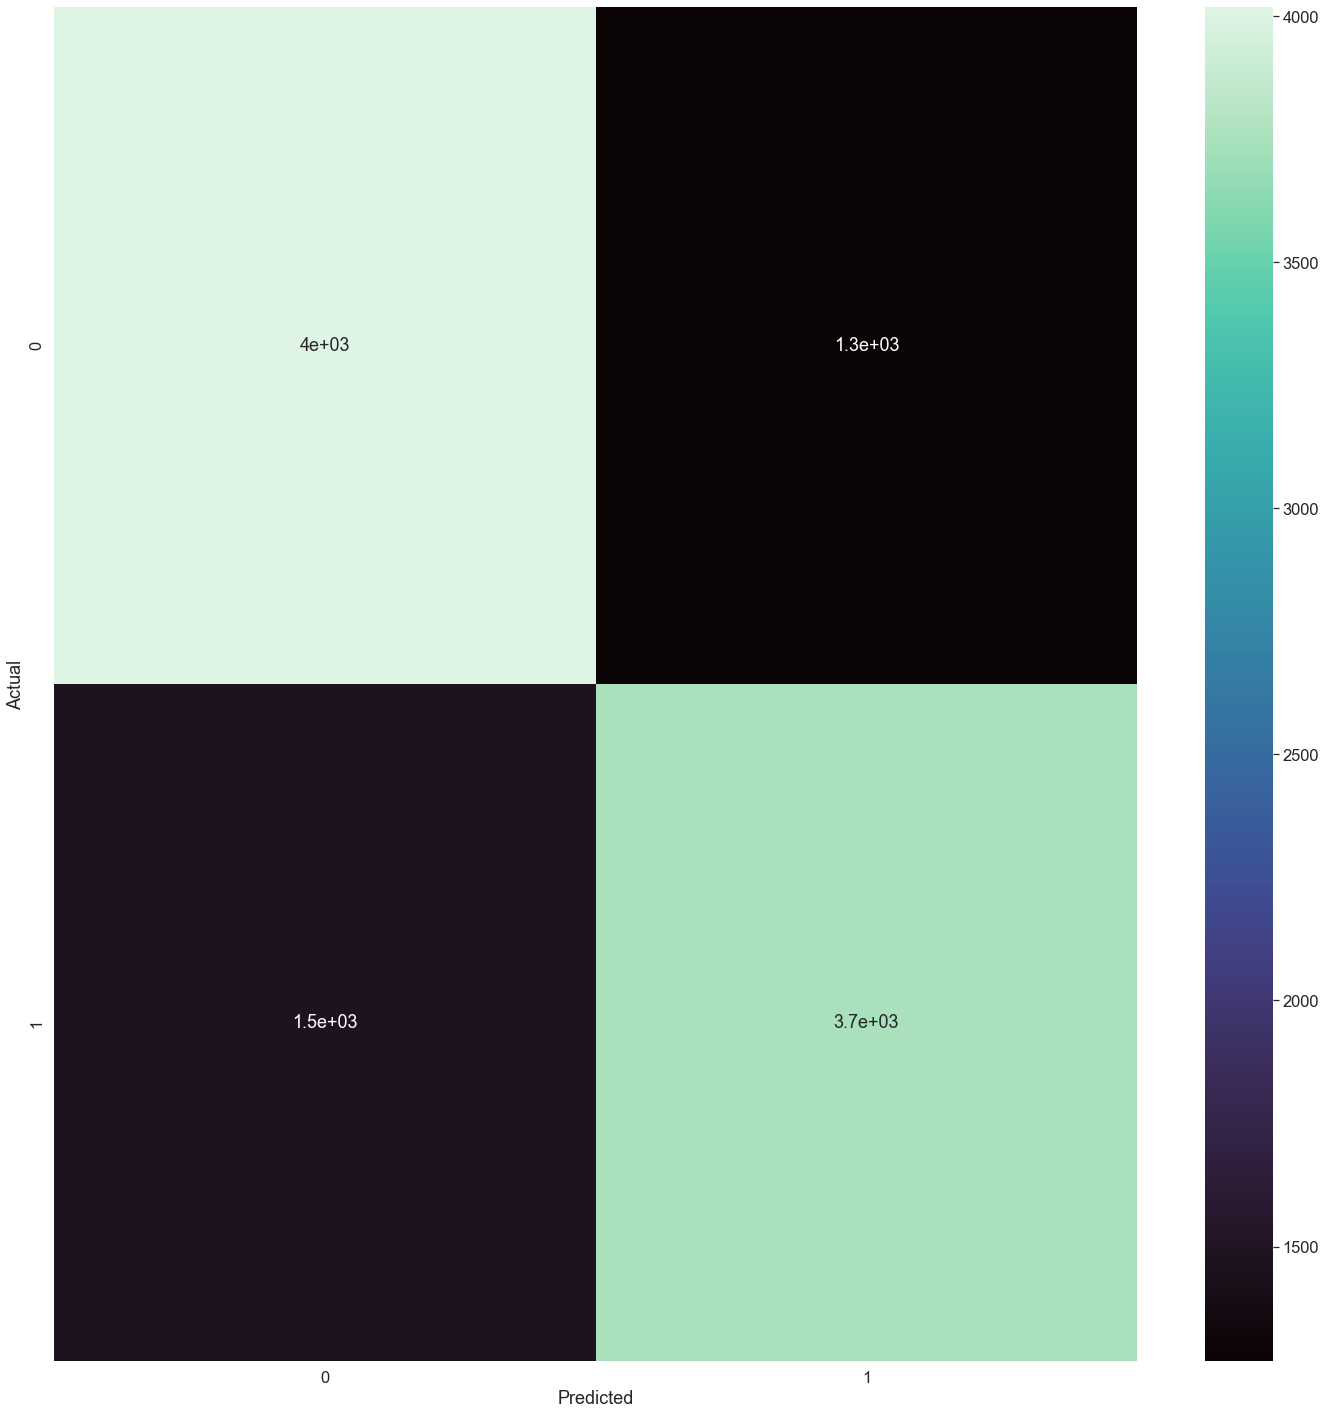

In [333]:
sb.heatmap(pd.DataFrame(con_mat_knnc), annot=True, cmap="mako")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()

# Gradient Boosting

In [334]:
gb = GradientBoostingClassifier()
gb.fit(xtest,ytest)

GradientBoostingClassifier()

In [335]:
GB_train = gb.score(xtrain,ytrain)
GB_train

0.7340672268907563

In [336]:
GB_test = gb.score(xtest,ytest)
GB_test

0.7427619047619047

In [337]:
y_pred_gb = gb.predict(xtest)
accuracy_score(ytest,y_pred_gb)

0.7427619047619047

In [338]:
 confusion_matrix(ytest,y_pred_gb)

array([[4159, 1127],
       [1574, 3640]], dtype=int64)

In [339]:
print(classification_report(ytest,y_pred_gb))

              precision    recall  f1-score   support

           0       0.73      0.79      0.75      5286
           1       0.76      0.70      0.73      5214

    accuracy                           0.74     10500
   macro avg       0.74      0.74      0.74     10500
weighted avg       0.74      0.74      0.74     10500



# ROC Curve

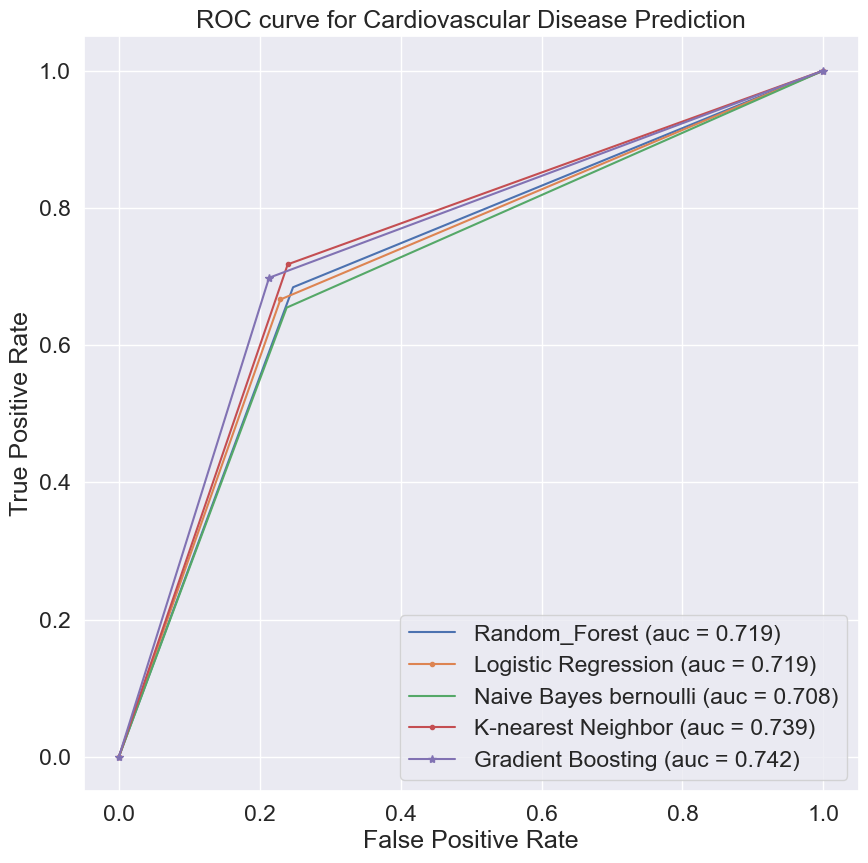

In [340]:
rfc_fpr, rfc_tpr, threshold = roc_curve(ytest,y_pred_rfc)
auc_rfc = auc(rfc_fpr, rfc_tpr)

log_fpr, log_tpr, threshold = roc_curve(ytest,y_pred_log)
auc_log = auc(log_fpr, log_tpr)

bnb_fpr, bnb_tpr, threshold = roc_curve(ytest, y_pred_bnb)
auc_bnb = auc(bnb_fpr, bnb_tpr)

knnc_fpr, knnc_tpr, threshold = roc_curve(ytest, y_pred_knnc)
auc_knnc = auc(knnc_fpr, knnc_tpr)

gb_fpr, gb_tpr, threshold = roc_curve(ytest, y_pred_gb)
auc_gb = auc(gb_fpr, gb_tpr)


plt.figure(figsize=(10,10), dpi=100)
plt.plot(rfc_fpr, rfc_tpr, linestyle='-', label='Random_Forest (auc = %0.3f)' % auc_rfc)
plt.plot(log_fpr, log_tpr, marker='.', label='Logistic Regression (auc = %0.3f)' % auc_log)
plt.plot(bnb_fpr, bnb_tpr, linestyle='-', label='Naive Bayes bernoulli (auc = %0.3f)' % auc_bnb)
plt.plot(knnc_fpr, knnc_tpr, marker='.', label='K-nearest Neighbor (auc = %0.3f)' % auc_knnc)
plt.plot(gb_fpr, gb_tpr, marker='*', label='Gradient Boosting (auc = %0.3f)' % auc_gb)

plt.title('ROC curve for Cardiovascular Disease Prediction')
#plt.xlabel('False positive rate (1-Specificity)')
#plt.ylabel('True positive rate (Sensitivity)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.grid(True)
plt.show()

In [341]:
data = [('Random Forest Classifier', RFC_train,RFC_test,),
 (' K-nearest Neighbor Classifier', KNNC_train,KNNC_test),
('Bernoulli Naive Bayes',BNB_train,BNB_test),
 ('Logistic Regression', LOG_train,LOG_test ),
('Gradient Boosting', GB_train,GB_test)]

Scores_ =pd.DataFrame(data = data, columns=['Model Name','Train Accuracy', 'Test Accuracy'])

Scores_.set_index('Model Name', inplace = True)

Scores_

,Train Accuracy,Test Accuracy
Model Name,,
Random Forest Classifier,1.000000,0.718762
K-nearest Neighbor Classifier,0.608924,0.739143
Bernoulli Naive Bayes,0.716504,0.708571
Logistic Regression,0.723681,0.718952
Gradient Boosting,0.734067,0.742762


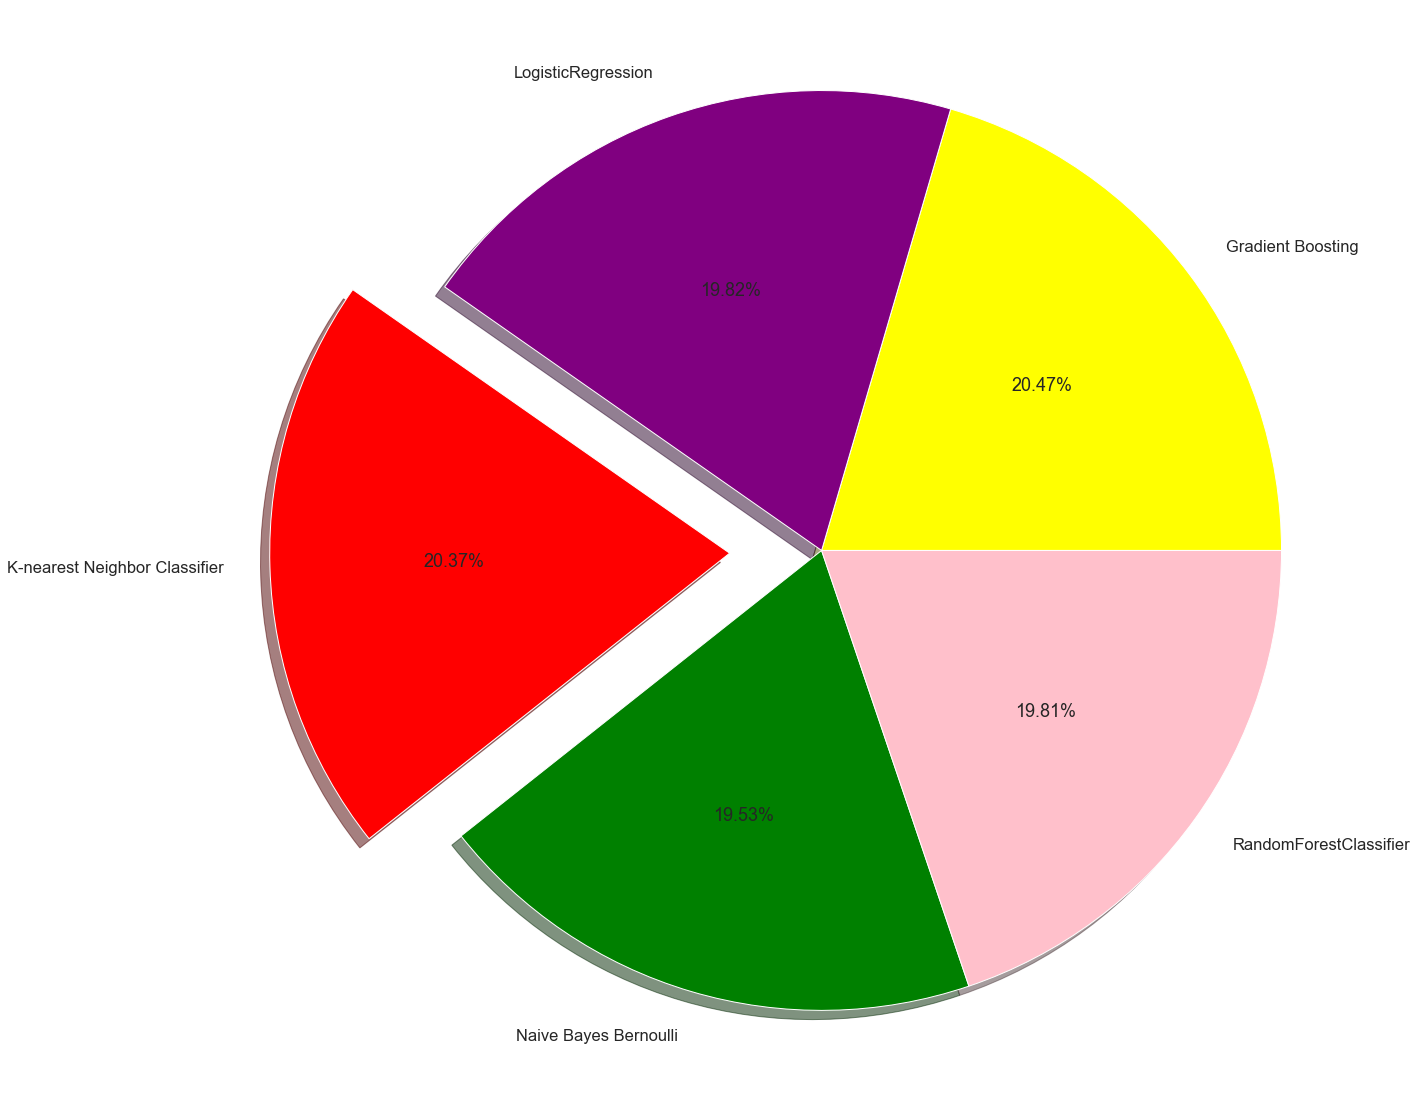

In [342]:
#testing innacuracy level accross various models
import matplotlib.pyplot as plt
Algorithm=["Gradient Boosting","LogisticRegression","K-nearest Neighbor Classifier","Naive Bayes Bernoulli","RandomForestClassifier"]
algo=[GB_test,LOG_test,KNNC_test, BNB_test, RFC_test]
plt.pie(algo,explode=[0,0,0.2,0,0],labels=Algorithm,shadow =True, autopct="%.2f%%",colors=['yellow','purple','red','green','pink'])
plt.axis("equal")
plt.show()